In [275]:
%run functions.py

import numpy as np
import pandas as pd
from scipy.io import loadmat

from sklearn.svm import LinearSVC
from sklearn.linear_model import Lasso,ElasticNet
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC


## Load settings

In [276]:
pd.set_option('display.max_colwidth',-1)

k=10 # Define k for crossvalidation
seed = 42 # Seed to use
feature_tot = 0 # Total selected features -> Start at 0 before PCA

scoring='accuracy' # Scoring method for GridsearchCV
score_function = f_classif # Score function for Feature selection


np.random.seed(seed) # Define the random seed

In [277]:
# Define models that should be trained
estimators = [
    ('clf', LinearSVC()),
]
param_grid = [
    {
        'clf':[LinearSVC()],
        'clf__penalty':['l1','l2'],
        'clf__C': [0.1,0.5,1,1.5,2.0],
        'clf__dual':[True,False]
    },{
        'clf':[KNeighborsClassifier()],
        'clf__n_neighbors':[5,3,6,8],
        'clf__algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],
        'clf__leaf_size':[30,15,20,40]
    },{
        'clf':[SVC()],
        'clf__C':[1,0.5,1,5.2],
        'clf__kernel':['linear', 'poly', 'rbf', 'sigmoid'],
        'clf__degree':[1,2,3],
        'clf__gamma':['scale', 'auto'],
        'clf__max_iter':[-1,1000,5000,10000],
}]


# Task 5 - Classification 

## Load dataset

In [278]:

filename = "datasets/cancerWTrain.mat"

mat = loadmat(filename)
input_train = mat['cancerTrainX'].T

target_train = mat['cancerTrainY'].reshape(len(input_train))
input_test = mat['cancerTestX'].T

## Data info

In [279]:
get_data_info(input_train, target_train)

Length of 400
X.shape: (400, 30) y.shape: (400,)
Contains Nan: False False
Contains +inf: False False
Contains -inf: False False


## Preprocess
Normalize the dataset

In [280]:
input_train, input_test, target_train, input_train_copy, input_train_copy_normalized = preprocessing(input_train,target_train, input_test)

400


## Feature reduction
Reduce dimensionality by PCA transform

In [281]:
feature_tot, pca, pca_input = feature_reduction(input_train, target_train,input_train_copy)

original shape:    (400, 30)
transformed shape: (400, 10)
Explained variance: [0.44051208 0.19241213 0.09610965 0.06561167 0.04912958 0.04018143
 0.02397297 0.01747592 0.01477238 0.01229828]


# Plot PCA

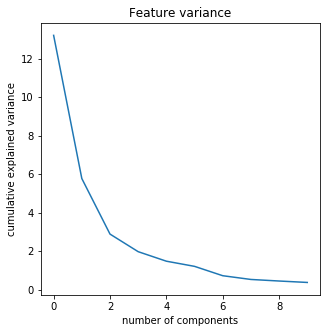

In [282]:
plot_feature_variance(pca_input)

## Plot top 10 histogram over reduced features

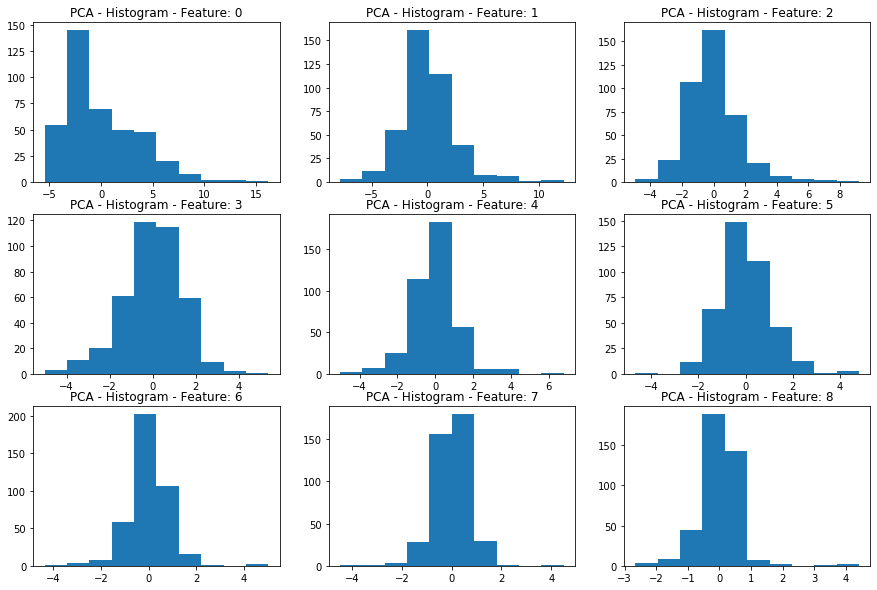

In [283]:
plot_top_features(feature_tot,pca_input)

# Feature selection
Extract top features above depending on PCA

(400, 30)


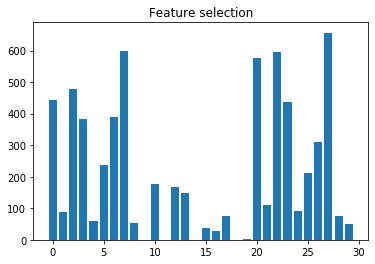

In [284]:
input_train_fs, input_test_fs = feature_selection(score_function, input_train, target_train, input_test, feature_tot=feature_tot)

## Hyperparameter tuning

In [285]:
# GridSearchCV
grid = parameter_tuning(estimators, param_grid, scoring, input_train_fs, target_train, k)


## Get Model info

In [286]:
get_model_info(grid)

Best score: 0.96
Best params {'clf': SVC(C=5.2, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=1, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False), 'clf__C': 5.2, 'clf__degree': 1, 'clf__gamma': 'scale', 'clf__kernel': 'rbf', 'clf__max_iter': -1}


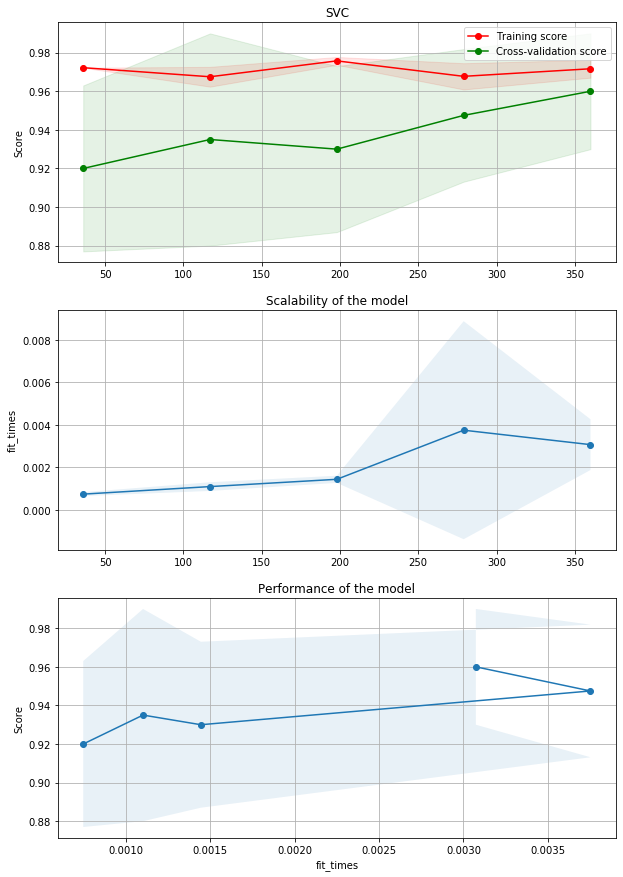

In [287]:
validate_curve(grid, input_train_fs, target_train,scoring=scoring, k=k)

# Predict testset

In [288]:
model = predict_model(grid, input_train_fs, target_train, input_test_fs)

[0 0 1 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 1 1 0 0 1 1 0
 0 0 0 1 1 1 1 0 0 1 0 0 0 0 0 1 0 0 0 1 1 0 1 1 1 0 1 0 0 0 1 0 1 1 0 0 1
 0 1 0 0 0 1 1 0 1 1 0 1 1 0 1 1 1 1 0 1 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 1
 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 1 0 1 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 0
 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0]
